In [17]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [18]:
from itertools import count
import requests
import json

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from tqdm import tqdm

In [19]:
# load citation graph
with open('../citationgraph/graph.json') as f:
    G = json.load(f)
G = nx.cytoscape_graph(G)

print(G.number_of_nodes())

110934


In [20]:
interpretability_areas = [
    'Interpretability and Analysis of Models for NLP',
    'Interpretability and Analysis of Models for NLP; Language Generation',
    'Interpretability and Analysis of Models for NLP; Summarization',
    'Interpretability, Interactivity and Analysis of Models for NLP',
    'Interpretability, Interactivity, and Analysis of Models for NLP'
]

# mt areas
# interpretability_areas = [
#     'Area G (Machine Translation and Multilinguality) [LONG]',
#     'Machine Translation',
#     'Machine Translation and Multilinguality',
#     'Machine Translation, Multilinguality',
#     'Neural Machine Translation'
# ]

In [21]:
# filter graph based on nodes

def filter_node(nid): # node id as argument
    if "area" in G.nodes[nid]:
        return G.nodes[nid]["area"] in interpretability_areas
    else:
        return False

V = nx.subgraph_view(G, filter_node=filter_node)

In [22]:
V.number_of_nodes()

361

In [23]:
# compare citationCount to number of edges
citations, edges = 0, 0
for node in V.nodes:
    citations += G.nodes[node]["citationCount"]
    edges += G.out_degree(node)

print(citations)
print(edges)

13162.0
13156


In [24]:
for node in V.nodes:
    print(len(G[node]))
    break

31


In [25]:
I = nx.DiGraph()

for node in tqdm(V.nodes):
    # for directed graphs this produces the “out” neighborhood or successors
    E = nx.ego_graph(G, node, radius=1, center=True, undirected=False)
    # print(len(E.nodes))
    I = nx.compose(I, E)

100%|██████████| 361/361 [00:07<00:00, 51.42it/s]


In [26]:
I.number_of_nodes()

8901

In [27]:
from collections import Counter

In [28]:
area_counts = Counter(dict(I.nodes(data="area")).values())
area_counts = {"None" if k is None else k:v for k,v in area_counts.items()}

Text(0.5, 1.0, 'Top10 areas of papers that cite MT papers')

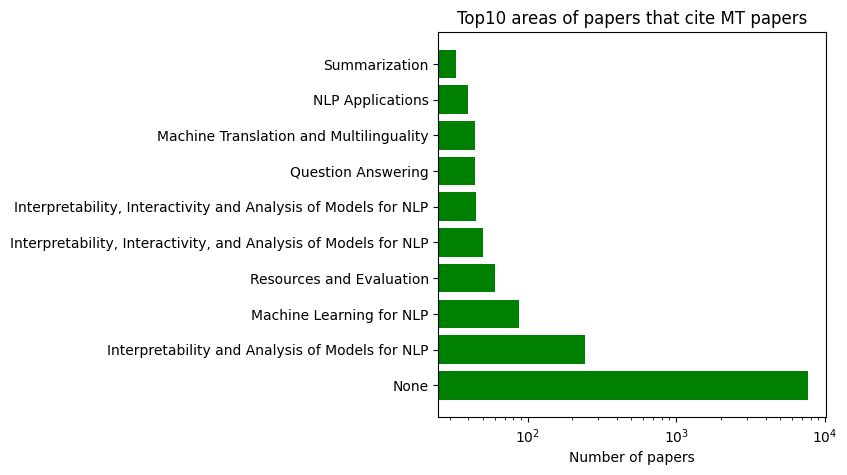

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

topk = 10

sorted_area_counts = {k: v for k, v in sorted(area_counts.items(), key=lambda item: item[1], reverse=True)}

values = list(sorted_area_counts.values())[:topk]
keys = list(sorted_area_counts.keys())[:topk]
axes.barh(range(len(values)), values, color="green")

axes.set_xscale("log")
axes.set_yticks(range(len(keys)))
axes.set_yticklabels(keys)

axes.set_xlabel("Number of papers")

axes.set_title("Top10 areas of papers that cite MT papers")

In [30]:
# save graph to gephi format
# nx.write_gexf(I, '../citationgraph/interpretability_graph.gexf', encoding='utf-8')

In [31]:
# # get neighbors
# for node in V.nodes:
#     neighbors = G.neighbors(node)
#     print(neighbors)
#     for neighbor in neighbors:
#         print(neighbor)
#         print(G.nodes[neighbor])
#         print(len(list(G.neighbors(neighbor))))
#     #     break
#     # break

In [32]:
# def filter_edge(n1, n2):
#     return G[n1][n2].get("cross_me", True)

# V = nx.subgraph_view(G, filter_edge=filter_edge)